In [ ]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data and basic cleaning
df = pd.read_csv("https://raw.githubusercontent.com/saeed-saffari/stories-in-data/main/data/3410028501_databaseLoadingData.csv")
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df.head()

,REF_DATE,GEO,DGUID,Type of building,Type of work,Variables,"Seasonal adjustment, value type",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-01-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,8976855,NaN,NaN,NaN,0
1,2020-02-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,8322252,NaN,NaN,NaN,0
2,2020-03-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,7181264,NaN,NaN,NaN,0
3,2020-04-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,5947094,NaN,NaN,NaN,0
4,2020-05-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,7908855,NaN,NaN,NaN,0


In [6]:
trend_df = df[
    (df['GEO'].isin(['Nova Scotia', 'Halifax, Nova Scotia'])) &
    (df['Type of building'] == 'Total residential and non-residential')
]

In [7]:
monthly_trend = trend_df.groupby(['REF_DATE', 'GEO'])['VALUE'].sum().reset_index()

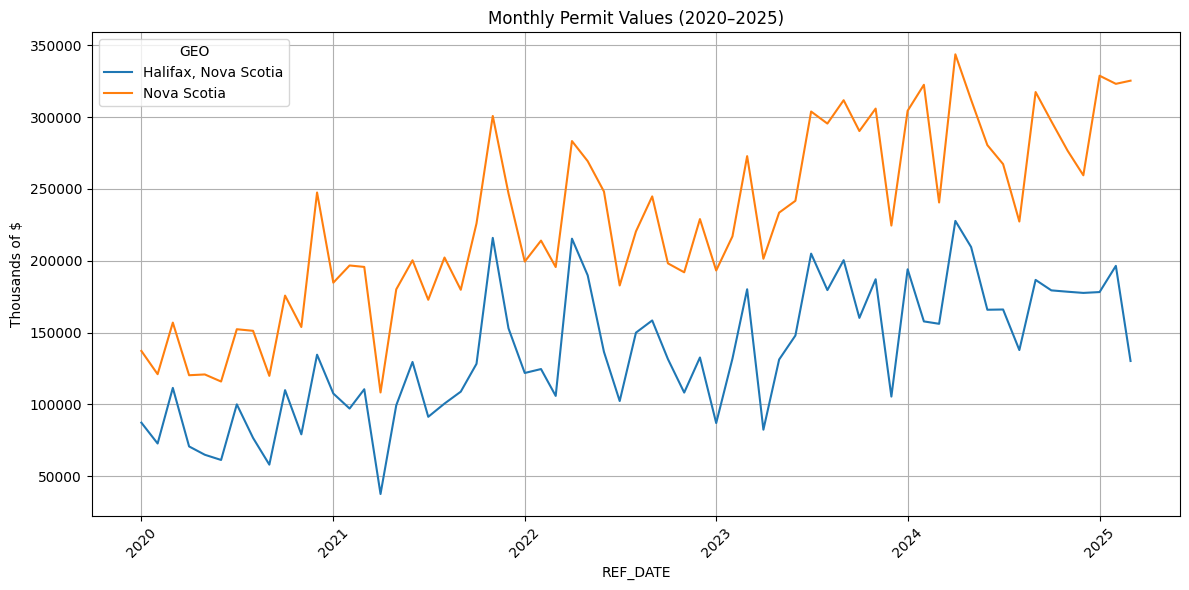

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='REF_DATE', y='VALUE', hue='GEO')
plt.title("Monthly Permit Values (2020–2025)")
plt.ylabel("Thousands of $")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

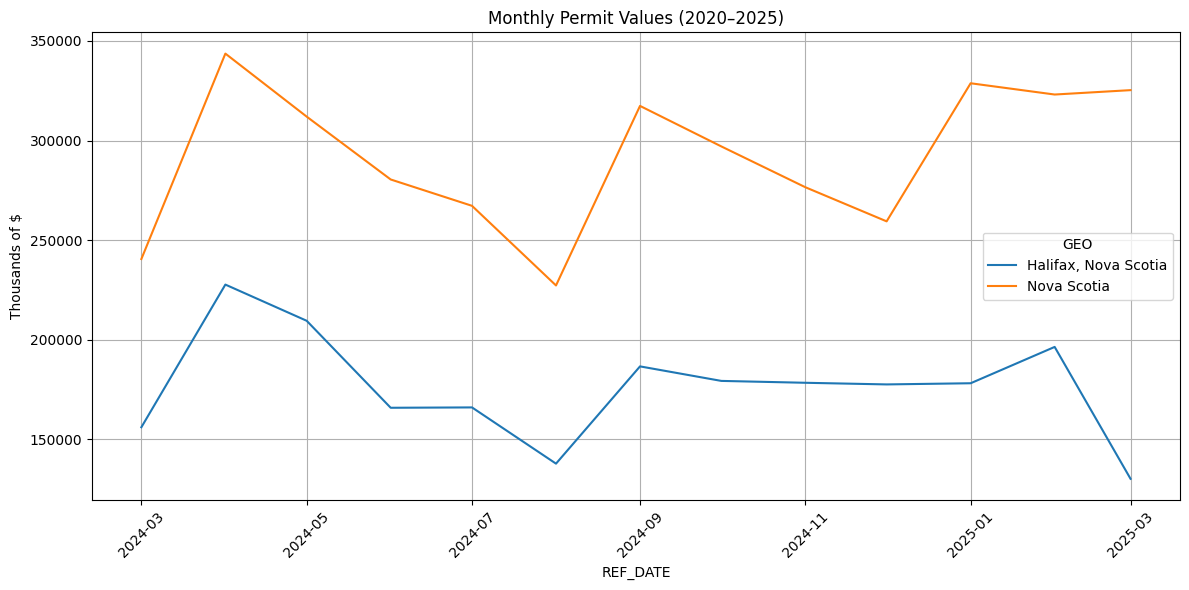

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend.iloc[-26:], x='REF_DATE', y='VALUE', hue='GEO')
plt.title("Monthly Permit Values (2020–2025)")
plt.ylabel("Thousands of $")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

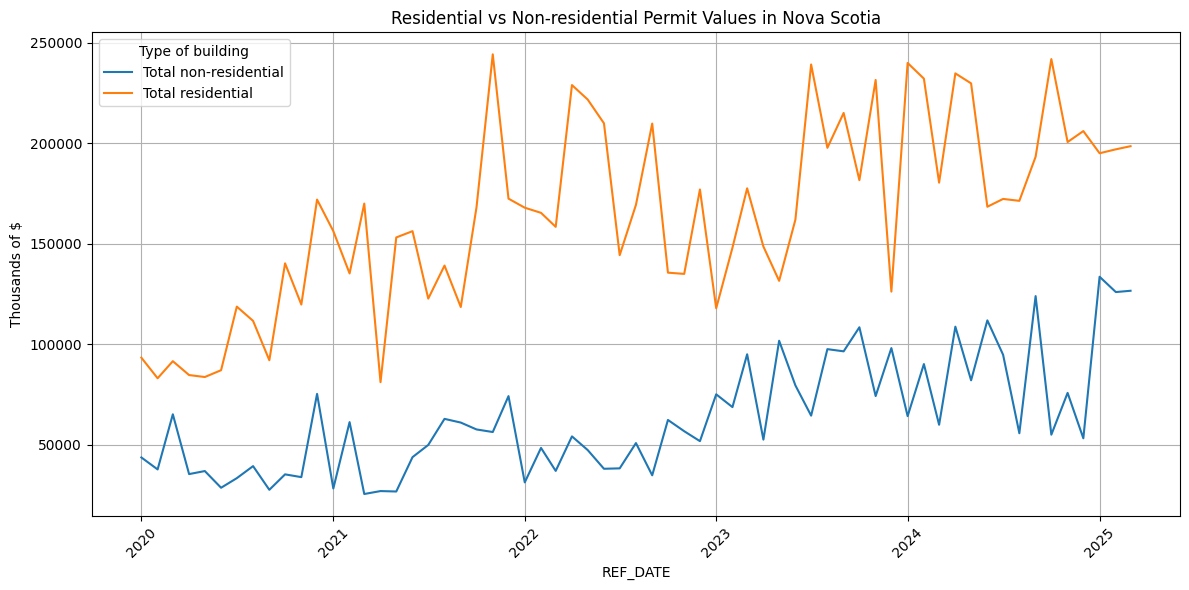

In [56]:
res_nonres_df = df[
    (df['GEO'] == 'Nova Scotia') &
    (df['Type of building'].isin(['Total residential', 'Total non-residential']))
]
res_nonres_grouped = res_nonres_df.groupby(['REF_DATE', 'Type of building'])['VALUE'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=res_nonres_grouped, x='REF_DATE', y='VALUE', hue='Type of building')
plt.title("Residential vs Non-residential Permit Values in Nova Scotia")
plt.ylabel("Thousands of $")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

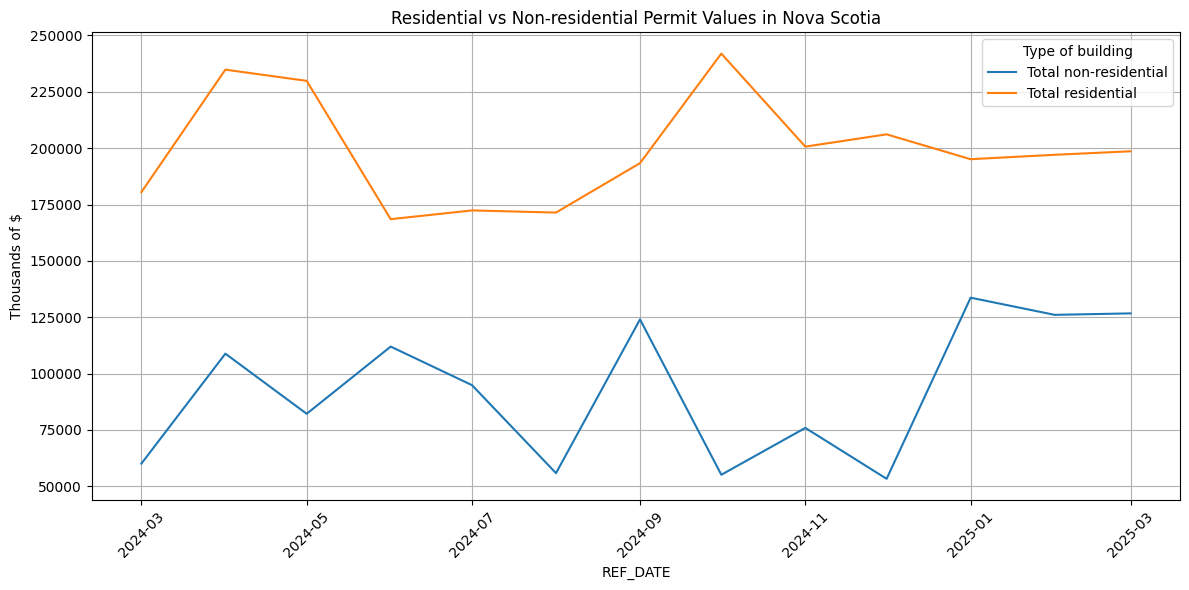

In [62]:
res_nonres_df = df[
    (df['GEO'] == 'Nova Scotia') &
    (df['Type of building'].isin(['Total residential', 'Total non-residential']))
]
res_nonres_grouped = res_nonres_df.groupby(['REF_DATE', 'Type of building'])['VALUE'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=res_nonres_grouped.iloc[-26:], x='REF_DATE', y='VALUE', hue='Type of building')
plt.title("Residential vs Non-residential Permit Values in Nova Scotia")
plt.ylabel("Thousands of $")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

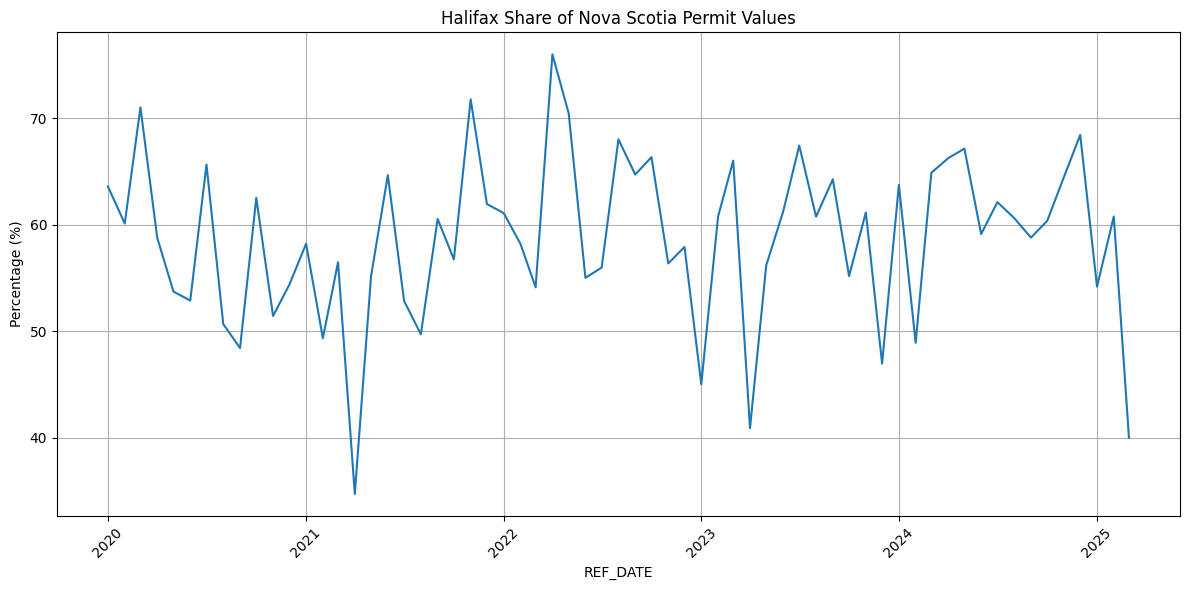

In [63]:
ns_total = df[(df['GEO'] == 'Nova Scotia') & (df['Type of building'] == 'Total residential and non-residential')]
halifax = df[(df['GEO'] == 'Halifax, Nova Scotia') & (df['Type of building'] == 'Total residential and non-residential')]

merged = pd.merge(
    ns_total[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'NS'}),
    halifax[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Halifax'}),
    on='REF_DATE'
)
merged['Share (%)'] = 100 * merged['Halifax'] / merged['NS']

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x='REF_DATE', y='Share (%)')
plt.title("Halifax Share of Nova Scotia Permit Values")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


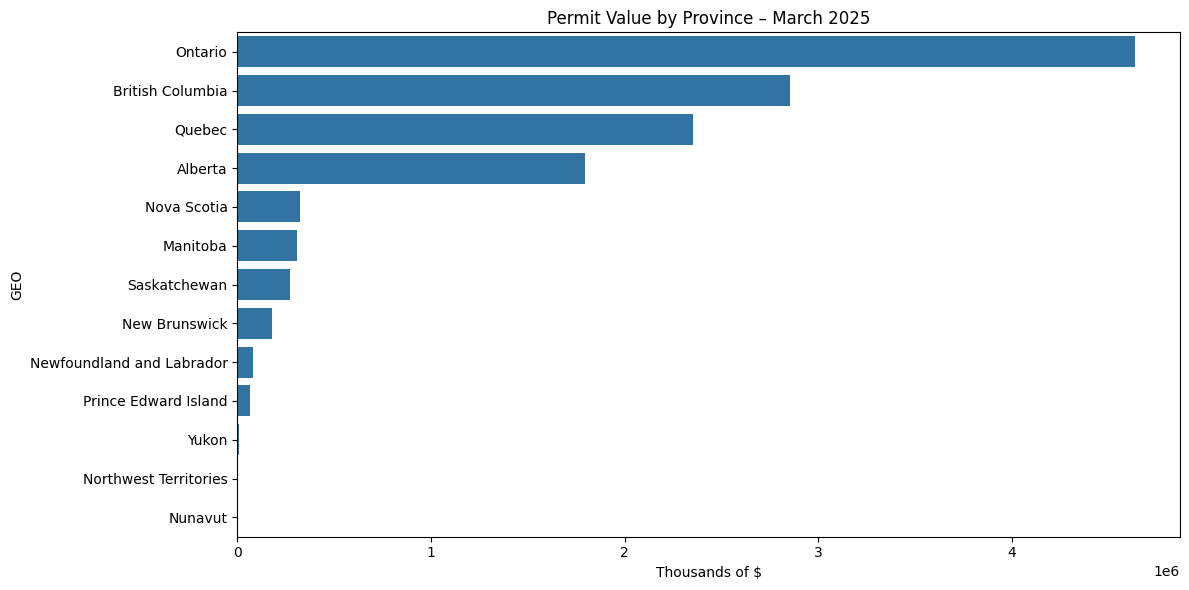

In [67]:
month_df = df[
    (df['REF_DATE'] == '2025-03-01') &
    (df['Type of building'] == 'Total residential and non-residential') &
    (~df['GEO'].isin(['Canada', 'Halifax, Nova Scotia']))
]

month_df_sorted = month_df.groupby('GEO')['VALUE'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=month_df_sorted, y='GEO', x='VALUE')
plt.title("Permit Value by Province – March 2025")
plt.xlabel("Thousands of $")
plt.tight_layout()
plt.show()

Top Region in 2023:
       GEO     VALUE
0  Ontario  14526851


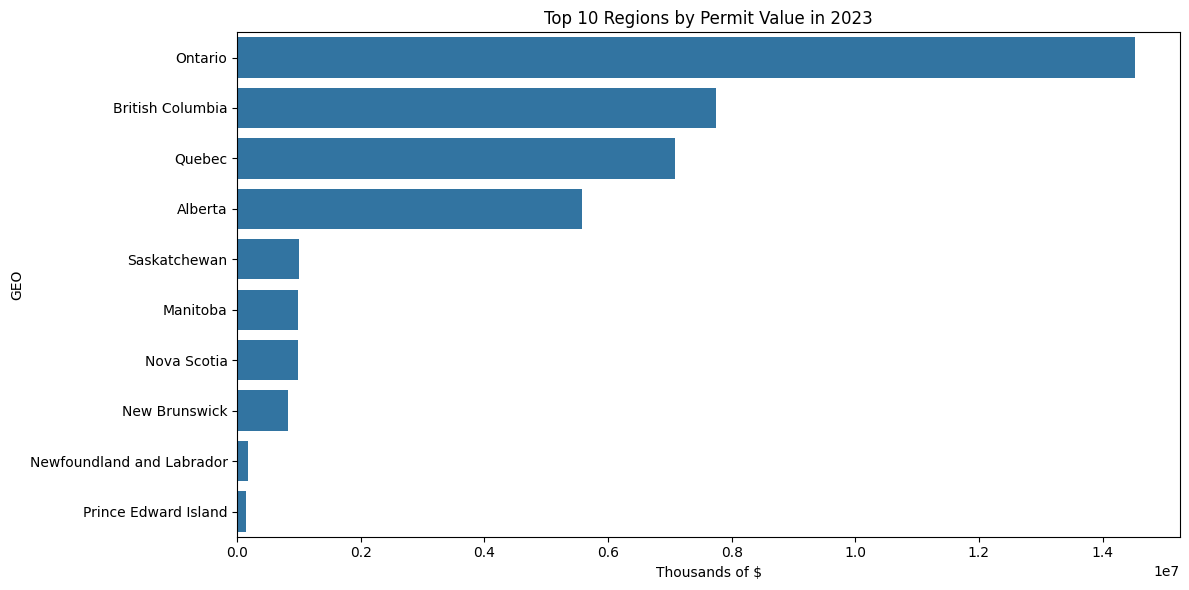

In [70]:
year_df = df[
    (df['REF_DATE'].dt.year == 2025) &
    (df['Type of building'] == 'Total residential and non-residential')&
    (~df['GEO'].isin(['Canada', 'Halifax, Nova Scotia']))
]
region_total = year_df.groupby('GEO')['VALUE'].sum().sort_values(ascending=False).reset_index()

print("Top Region in 2023:")
print(region_total.head(1))

plt.figure(figsize=(12, 6))
sns.barplot(data=region_total.head(10), x='VALUE', y='GEO')
plt.title("Top 10 Regions by Permit Value in 2023")
plt.xlabel("Thousands of $")
plt.tight_layout()
plt.show()

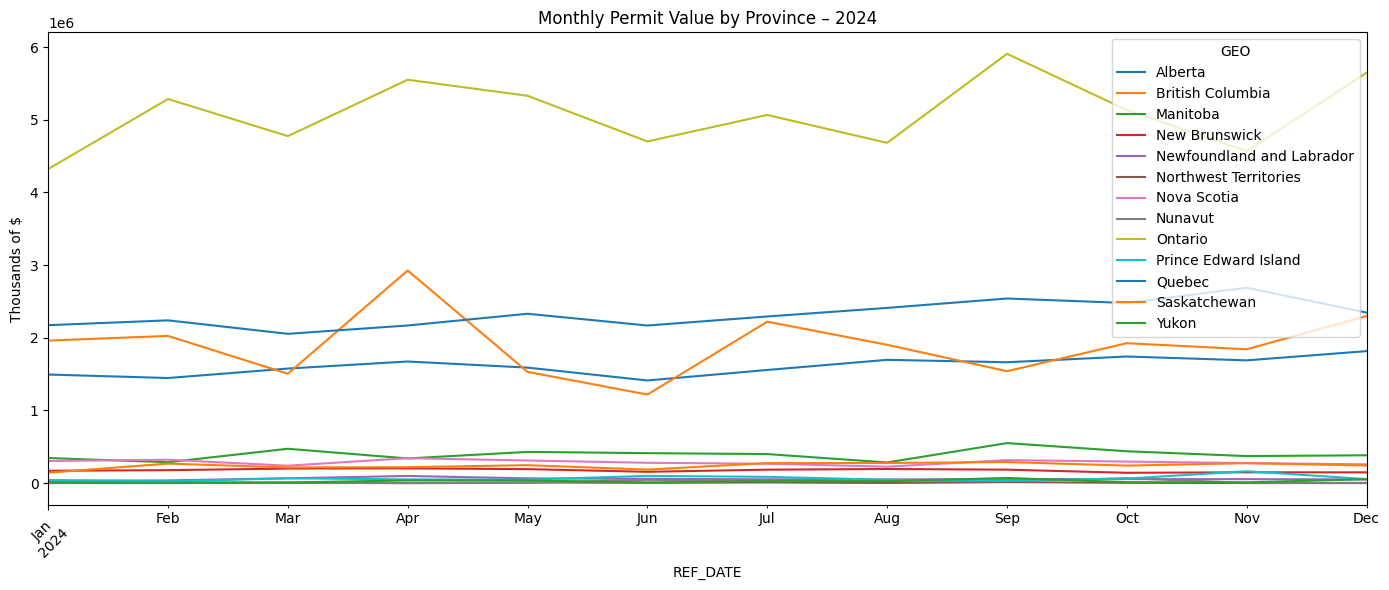

In [71]:
monthly_2024 = df[
    (df['REF_DATE'].dt.year == 2024) &
    (df['Type of building'] == 'Total residential and non-residential') &
    (~df['GEO'].isin(['Canada', 'Halifax, Nova Scotia']))
]

pivot_2024 = monthly_2024.pivot_table(
    index='REF_DATE', columns='GEO', values='VALUE', aggfunc='sum'
)

pivot_2024.plot(figsize=(14, 6))
plt.title("Monthly Permit Value by Province – 2024")
plt.ylabel("Thousands of $")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


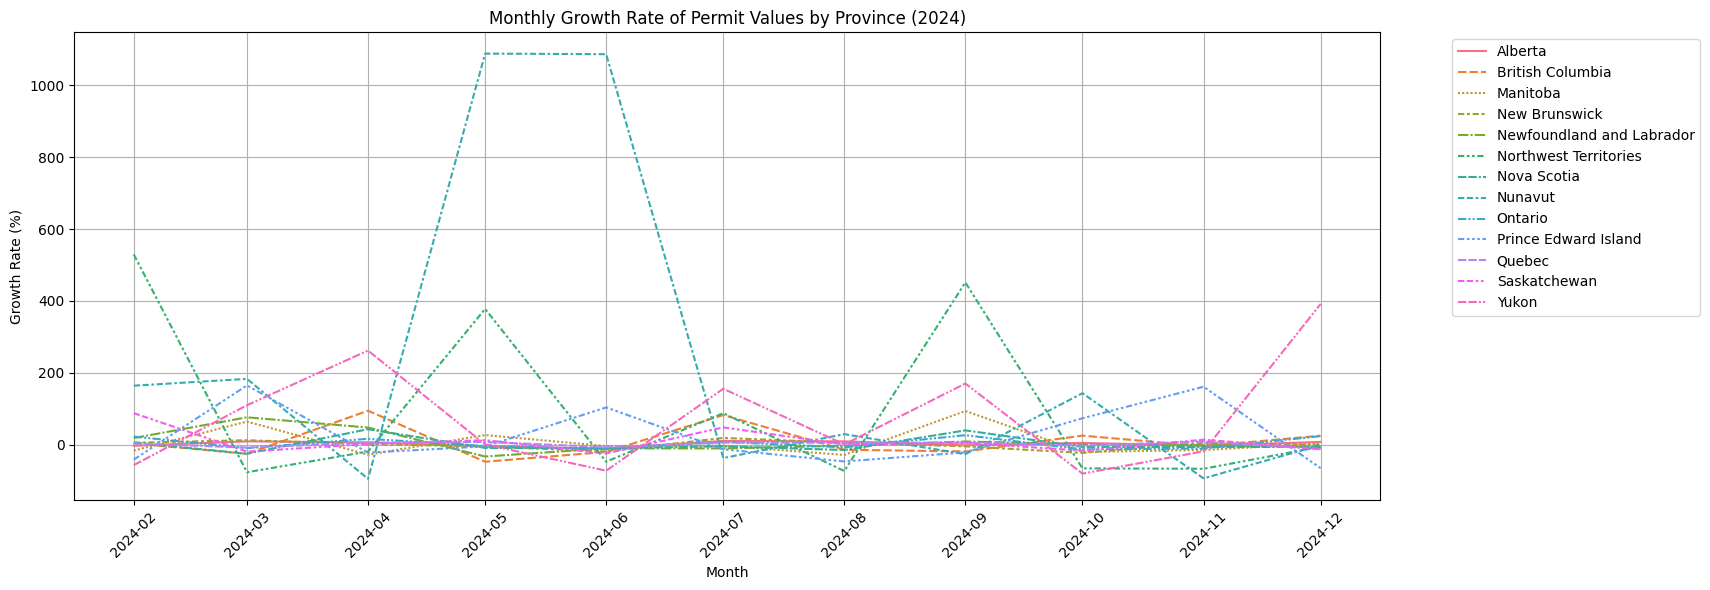

In [74]:
# Filter for 2024 and relevant building type
growth_df = df[
    (df['REF_DATE'].dt.year == 2024) &
    (df['Type of building'] == 'Total residential and non-residential') &
    (~df['GEO'].isin(['Canada', 'Halifax, Nova Scotia']))  # remove national & metro
]

# Pivot table: rows = date, columns = province, values = permit value
pivot_growth = growth_df.pivot_table(
    index='REF_DATE', columns='GEO', values='VALUE', aggfunc='sum'
)

# Calculate monthly growth rate
growth_rate = pivot_growth.pct_change() * 100  # percentage change

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=growth_rate)
plt.title("Monthly Growth Rate of Permit Values by Province (2024)")
plt.ylabel("Growth Rate (%)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [8]:
df = pd.read_csv("data/3410028501_databaseLoadingData.csv")
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df.head()

,REF_DATE,GEO,DGUID,Type of building,Type of work,Variables,"Seasonal adjustment, value type",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-01-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,8976855,NaN,NaN,NaN,0
1,2020-02-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,8322252,NaN,NaN,NaN,0
2,2020-03-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,7181264,NaN,NaN,NaN,0
3,2020-04-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,5947094,NaN,NaN,NaN,0
4,2020-05-01,Canada,2021A000011124,Total residential and non-residential,"Types of work, total",Value of permits,"Seasonally adjusted, current",Dollars,81,thousands,3,v1578843489,1.1.1.1.2,7908855,NaN,NaN,NaN,0


In [9]:
pop = pd.read_csv('data/1710000901_databaseLoadingData.csv')
pop.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-01,Canada,2016A000011124,Persons,249,units,0,v1,1,37928208,NaN,NaN,NaN,0
1,2020-04,Canada,2016A000011124,Persons,249,units,0,v1,1,38006941,NaN,NaN,NaN,0
2,2020-07,Canada,2016A000011124,Persons,249,units,0,v1,1,38028638,NaN,NaN,NaN,0
3,2020-10,Canada,2016A000011124,Persons,249,units,0,v1,1,38027406,NaN,NaN,NaN,0
4,2021-01,Canada,2016A000011124,Persons,249,units,0,v1,1,38058291,NaN,NaN,NaN,0


In [10]:
# Convert population data to monthly by forward-filling
pop_monthly = pop.copy()
pop_monthly['REF_DATE'] = pd.to_datetime(pop_monthly['REF_DATE'])

# Create a monthly date range covering the same period
monthly_range = pd.date_range(start=pop_monthly['REF_DATE'].min(), end=pop_monthly['REF_DATE'].max(), freq='MS')
all_geo = pop_monthly['GEO'].unique()

# Create full monthly GEO-date grid
pop_full = pd.DataFrame([(date, geo) for date in monthly_range for geo in all_geo], columns=['REF_DATE', 'GEO'])

# Merge and forward-fill population values
pop_aligned = pd.merge(pop_full, pop_monthly[['REF_DATE', 'GEO', 'VALUE']], on=['REF_DATE', 'GEO'], how='left')
pop_aligned['POPULATION'] = pop_aligned.groupby('GEO')['VALUE'].ffill()
pop_aligned = pop_aligned.drop(columns='VALUE')


In [11]:
# Prepare permit data
permit_total = df[
    (df['Type of building'] == 'Total residential and non-residential') &
    (~df['GEO'].isin(['Canada', 'Halifax, Nova Scotia']))
][['REF_DATE', 'GEO', 'VALUE']]

# Merge with monthly population
merged = pd.merge(
    permit_total, pop_aligned, on=['REF_DATE', 'GEO'], how='left'
)

# Calculate per capita permit value
merged['PER_CAPITA_VALUE'] = merged['VALUE'] / merged['POPULATION'] * 1000


In [95]:
merged

,REF_DATE,GEO,VALUE,POPULATION,PER_CAPITA_VALUE
0,2020-01-01,Newfoundland and Labrador,77344,528231.0,146.420789
1,2020-02-01,Newfoundland and Labrador,35855,528231.0,67.877501
2,2020-03-01,Newfoundland and Labrador,17960,528231.0,34.000276
3,2020-04-01,Newfoundland and Labrador,48635,527733.0,92.158345
4,2020-05-01,Newfoundland and Labrador,62565,527733.0,118.554269
...,...,...,...,...,...
814,2024-11-01,Nunavut,4060,41258.0,98.405158
815,2024-12-01,Nunavut,4019,41258.0,97.411411
816,2025-01-01,Nunavut,393,41414.0,9.489545
817,2025-02-01,Nunavut,4056,NaN,NaN


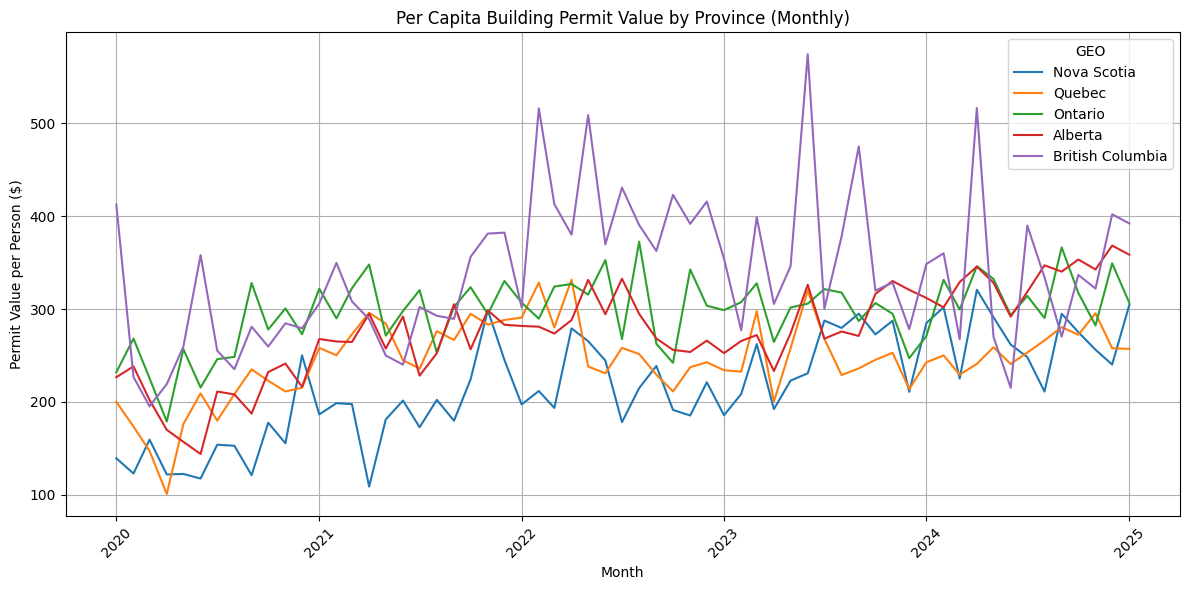

In [96]:
# Choose key provinces to highlight
selected_provinces = ['Nova Scotia', 'Ontario', 'British Columbia', 'Alberta', 'Quebec']
filtered = merged[merged['GEO'].isin(selected_provinces)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered, x='REF_DATE', y='PER_CAPITA_VALUE', hue='GEO')
plt.title("Per Capita Building Permit Value by Province (Monthly)")
plt.ylabel("Permit Value per Person ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
merged['REF_DATE']

0     2020-01-01
1     2020-02-01
2     2020-03-01
3     2020-04-01
4     2020-05-01
         ...    
814   2024-11-01
815   2024-12-01
816   2025-01-01
817   2025-02-01
818   2025-03-01
Name: REF_DATE, Length: 819, dtype: datetime64[ns]

In [118]:
merged.ffill(inplace=True)
target_date = pd.to_datetime("2025-03-01")
bar_df = merged[(merged['REF_DATE'] == target_date)]
bar_df

,REF_DATE,GEO,VALUE,POPULATION,PER_CAPITA_VALUE
62,2025-03-01,Newfoundland and Labrador,79806,545579.0,106.301745
125,2025-03-01,Prince Edward Island,65787,179280.0,229.244757
188,2025-03-01,Nova Scotia,325311,1079627.0,304.514430
251,2025-03-01,New Brunswick,177609,858963.0,533.513085
314,2025-03-01,Quebec,2352944,9111629.0,257.127019
377,2025-03-01,Ontario,4635792,16182641.0,306.613920
440,2025-03-01,Manitoba,309929,1504023.0,217.943476
503,2025-03-01,Saskatchewan,273145,1250909.0,183.734388
566,2025-03-01,Alberta,1792906,4960097.0,358.460933
629,2025-03-01,British Columbia,2854461,5722318.0,392.136543


/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_28262/871459236.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_df_sorted, y='GEO', x='PER_CAPITA_VALUE', palette='viridis')


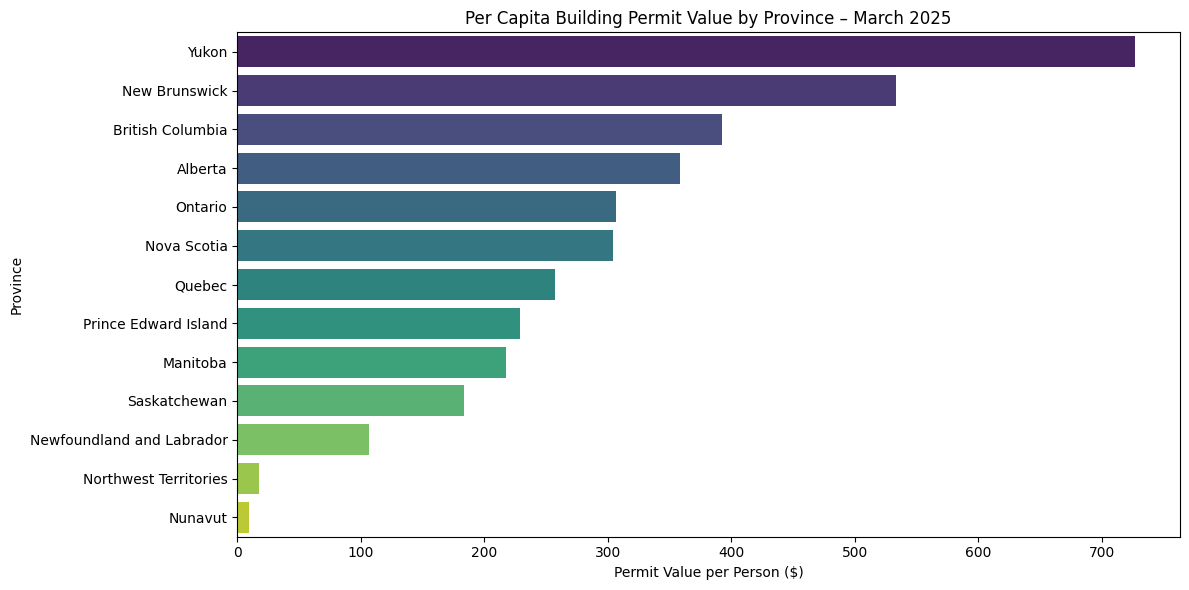

In [119]:
# Filter for one month
target_date = pd.to_datetime("2025-03-01")
bar_df = merged[(merged['REF_DATE'] == target_date)]

# Sort by per capita value
bar_df_sorted = bar_df.sort_values(by="PER_CAPITA_VALUE", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=bar_df_sorted, y='GEO', x='PER_CAPITA_VALUE', palette='viridis')
plt.title(f"Per Capita Building Permit Value by Province – {target_date.strftime('%B %Y')}")
plt.xlabel("Permit Value per Person ($)")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_28262/168835591.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth_bar.values, y=growth_bar.index, palette="coolwarm")


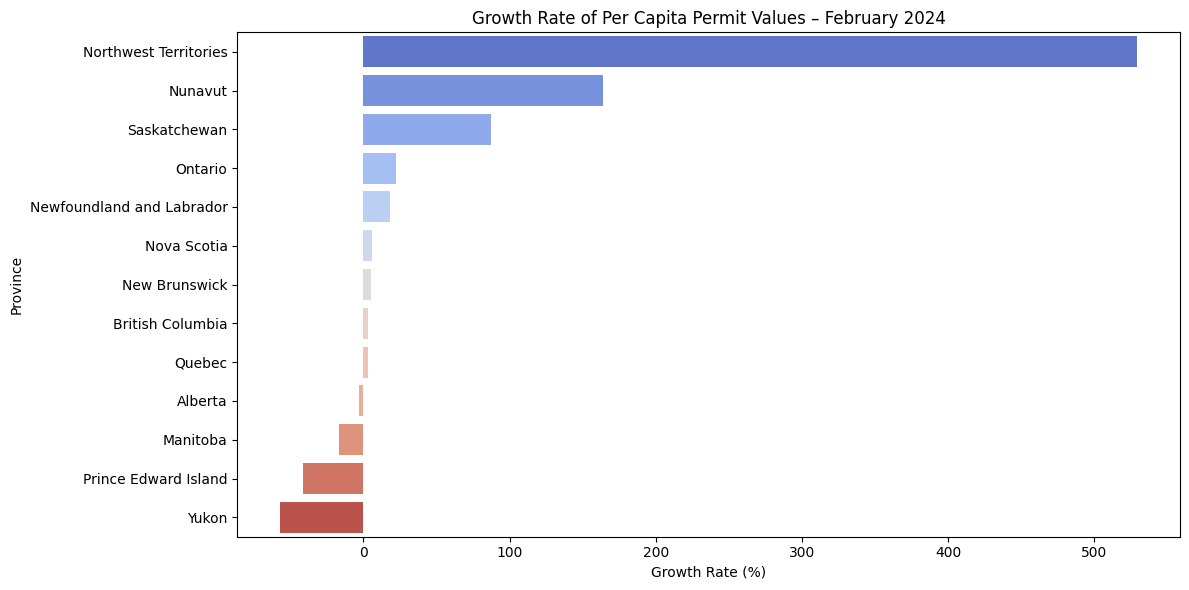

In [120]:
# Use pivot table again if not already defined
pivot_growth = merged.pivot_table(index='REF_DATE', columns='GEO', values='PER_CAPITA_VALUE')
growth_rate = pivot_growth.pct_change() * 100

# Select a recent month
growth_month = pd.to_datetime("2024-02-01")
growth_bar = growth_rate.loc[growth_month].dropna().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=growth_bar.values, y=growth_bar.index, palette="coolwarm")
plt.title(f"Growth Rate of Per Capita Permit Values – {growth_month.strftime('%B %Y')}")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Province")
plt.tight_layout()
plt.show()


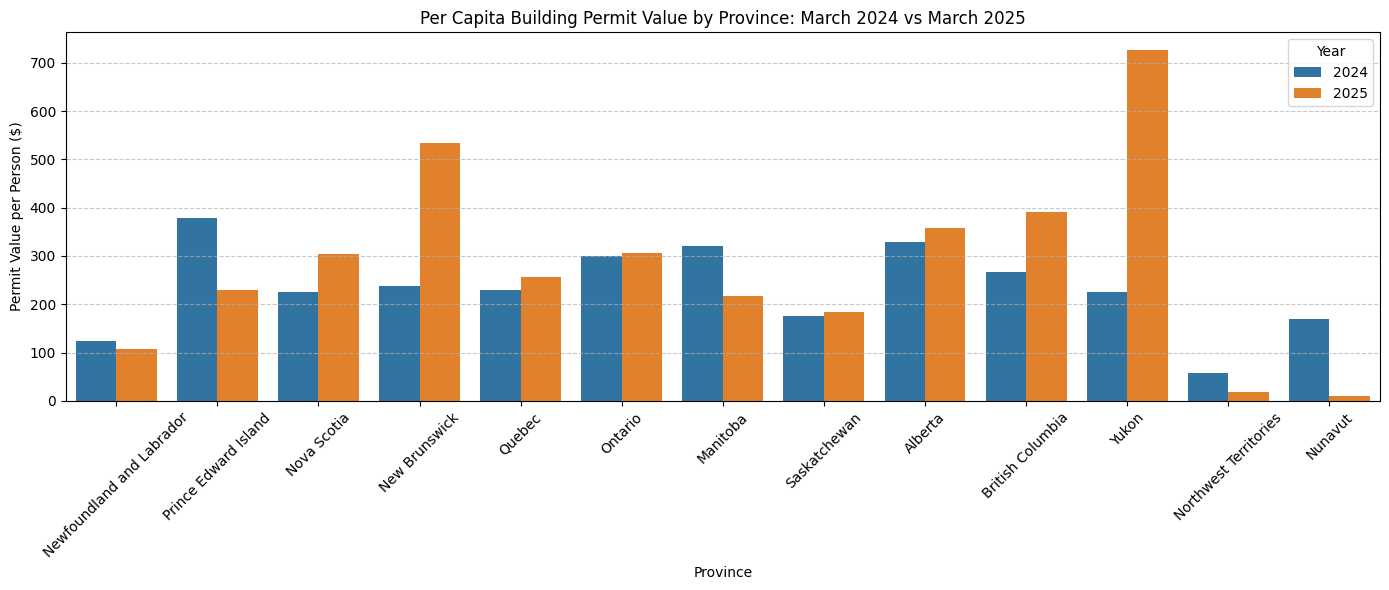

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data for March 2024 and March 2025
march_2024 = merged[merged['REF_DATE'] == pd.to_datetime("2024-03-01")].copy()
march_2025 = merged[merged['REF_DATE'] == pd.to_datetime("2025-03-01")].copy()

# Add a 'Year' column to both
march_2024['Year'] = '2024'
march_2025['Year'] = '2025'

# Combine both
bar_compare = pd.concat([march_2024, march_2025])

# Plot side-by-side bars for each province
plt.figure(figsize=(14, 6))
sns.barplot(data=bar_compare, x='GEO', y='PER_CAPITA_VALUE', hue='Year')
plt.title("Per Capita Building Permit Value by Province: March 2024 vs March 2025")
plt.ylabel("Permit Value per Person ($)")
plt.xlabel("Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [141]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
#
## Atlantic provinces
#atlantic = ['Nova Scotia', 'New Brunswick', 'Newfoundland and Labrador', 'Prince Edward Island']
#
## Filter merged data
#atlantic_df = merged[merged['GEO'].isin(atlantic)].copy()
#
## Extract year
#atlantic_df['Year'] = atlantic_df['REF_DATE'].dt.year
#
## Group by year and province, then average per capita value
#avg_per_capita = (
#    atlantic_df.groupby(['Year', 'GEO'])['PER_CAPITA_VALUE']
#    .mean()
#    .reset_index()
#)
#
## Plot
#plt.figure(figsize=(12, 6))
#sns.barplot(data=avg_per_capita, x='Year', y='PER_CAPITA_VALUE', hue='GEO')
#plt.title("Average Annual Per Capita Building Permit Value – Atlantic Provinces")
#plt.ylabel("Permit Value per Person ($)")
#plt.xlabel("Year")
#plt.grid(True, axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
#plt.show()
#

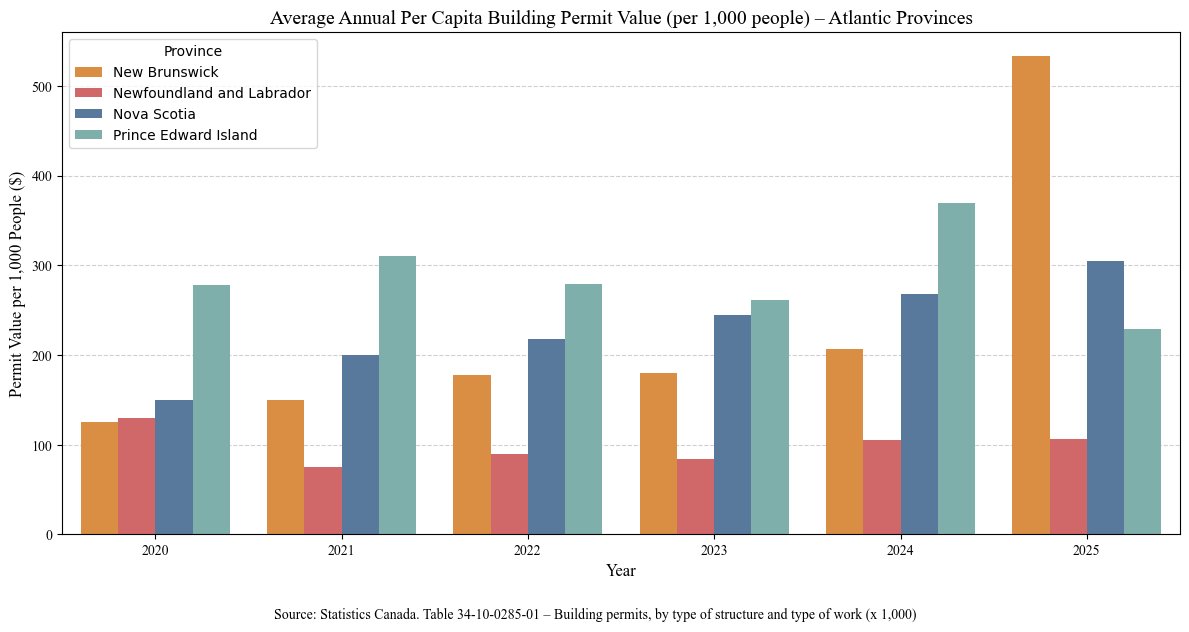

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Atlantic provinces
atlantic = ['Nova Scotia', 'New Brunswick', 'Newfoundland and Labrador', 'Prince Edward Island']

# Filter merged data
atlantic_df = merged[merged['GEO'].isin(atlantic)].copy()

# Extract year
atlantic_df['Year'] = atlantic_df['REF_DATE'].dt.year

# Group by year and province, then average per capita value
avg_per_capita = (
    atlantic_df.groupby(['Year', 'GEO'])['PER_CAPITA_VALUE']
    .mean()
    .reset_index()
)

# Custom professional palette (soft tones)
custom_palette = {
    'Nova Scotia': '#4E79A7',                # Blue
    'New Brunswick': '#F28E2B',              # Orange
    'Newfoundland and Labrador': '#E15759',  # Red
    'Prince Edward Island': '#76B7B2'        # Teal
}

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_per_capita,
    x='Year', y='PER_CAPITA_VALUE', hue='GEO',
    palette=custom_palette
)
plt.title("Average Annual Per Capita Building Permit Value (per 1,000 people) – Atlantic Provinces", fontsize=14, fontname='Times New Roman')
plt.ylabel("Permit Value per 1,000 People ($)", fontsize=12, fontname='Times New Roman')
plt.xlabel("Year", fontsize=12, fontname='Times New Roman')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=10, fontname='Times New Roman')
plt.legend(title='Province')
plt.tight_layout()

plt.gca().set_axisbelow(True)

plt.figtext(0.5, -0.04,
            'Source: Statistics Canada. Table 34-10-0285-01 – Building permits, by type of structure and type of work (x 1,000)',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')

#plt.savefig('builiding_permit_per_capita_average_2021_2025.png', dpi=500, bbox_inches='tight')

plt.show()

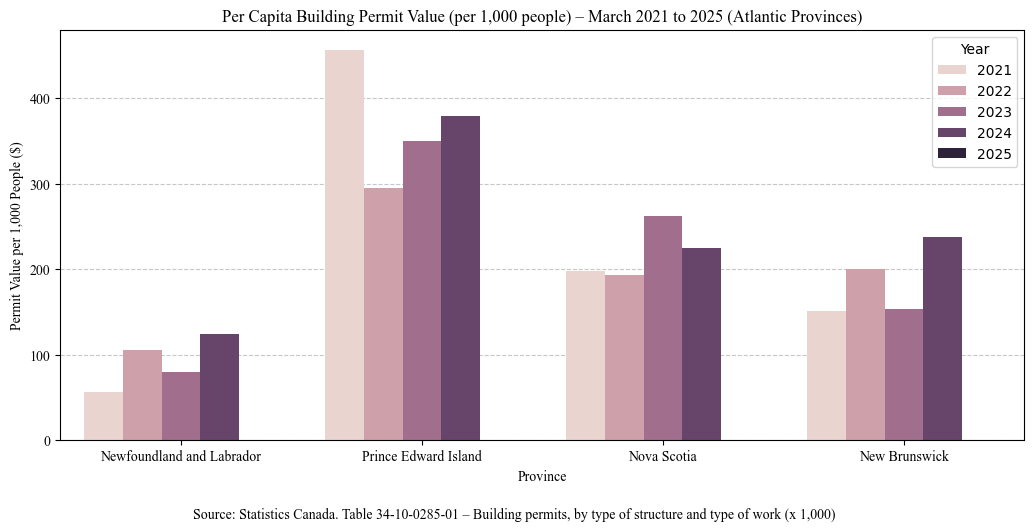

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Atlantic provinces
atlantic = ['Nova Scotia', 'New Brunswick', 'Newfoundland and Labrador', 'Prince Edward Island']

# Filter for March of 2023, 2024, and 2025
march_months = pd.to_datetime(["2021-03-01", "2022-03-01", "2023-03-01", "2024-03-01", "2025-03-01"])
march_data = merged[
    (merged['REF_DATE'].isin(march_months)) & 
    (merged['GEO'].isin(atlantic))
].copy()

# Extract year for grouping
march_data['Year'] = march_data['REF_DATE'].dt.year

STANDARD_PLOT_WIDTH = 10.5  # inches
STANDARD_PLOT_HEIGHT = 5.04  # inches
# Plot
plt.figure(figsize=(STANDARD_PLOT_WIDTH, STANDARD_PLOT_HEIGHT))
sns.barplot(data=march_data, x='GEO', y='PER_CAPITA_VALUE', hue='Year')
plt.title("Per Capita Building Permit Value (per 1,000 people) – March 2021 to 2025 (Atlantic Provinces)", fontname='Times New Roman')
plt.ylabel("Permit Value per 1,000 People ($)", fontname='Times New Roman')
plt.xlabel("Province", fontname='Times New Roman')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')

plt.figtext(0.5, -0.04,
            'Source: Statistics Canada. Table 34-10-0285-01 – Building permits, by type of structure and type of work (x 1,000)',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')

plt.gca().set_axisbelow(True)

#plt.savefig('builiding_permit_per_capita_2021_2025.png', dpi=500, bbox_inches='tight')

plt.show()


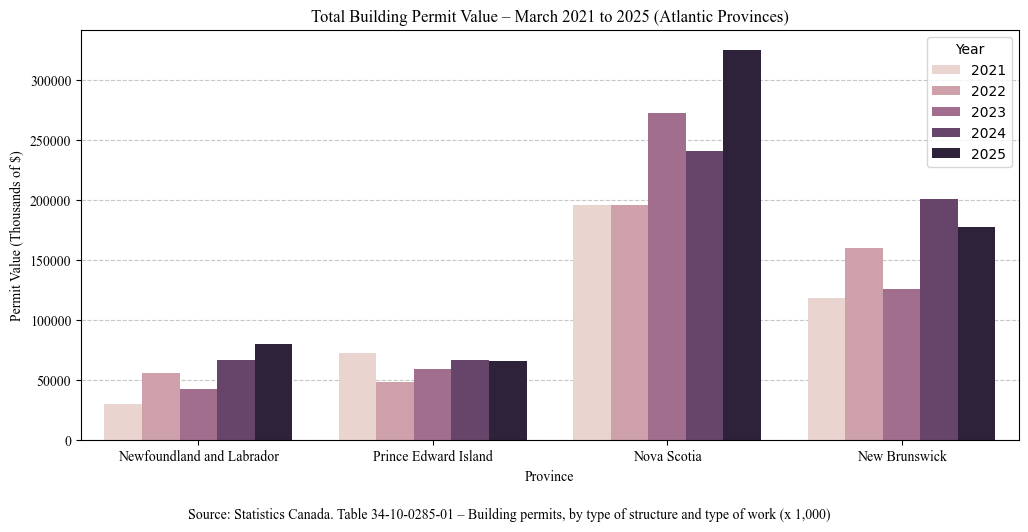

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Atlantic provinces
atlantic = ['Nova Scotia', 'New Brunswick', 'Newfoundland and Labrador', 'Prince Edward Island']

# Filter for March of 2023, 2024, and 2025
march_months = pd.to_datetime(["2021-03-01", "2022-03-01", "2023-03-01", "2024-03-01", "2025-03-01"])
march_total = df[
    (df['REF_DATE'].isin(march_months)) &
    (df['GEO'].isin(atlantic)) &
    (df['Type of building'] == 'Total residential and non-residential')
].copy()

# Extract year for grouping
march_total['Year'] = march_total['REF_DATE'].dt.year

STANDARD_PLOT_WIDTH = 10.5  # inches
STANDARD_PLOT_HEIGHT = 5.04  # inches
# Plot
plt.figure(figsize=(STANDARD_PLOT_WIDTH, STANDARD_PLOT_HEIGHT))
sns.barplot(data=march_total, x='GEO', y='VALUE', hue='Year')
plt.title("Total Building Permit Value – March 2021 to 2025 (Atlantic Provinces)", fontname='Times New Roman')
plt.ylabel("Permit Value (Thousands of $)", fontname='Times New Roman')
plt.xlabel("Province", fontname='Times New Roman')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')

plt.gca().set_axisbelow(True)

plt.figtext(0.5, -0.04,
            'Source: Statistics Canada. Table 34-10-0285-01 – Building permits, by type of structure and type of work (x 1,000)',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')

#plt.savefig('builiding_permit_2021_2025.png', dpi=500, bbox_inches='tight')
plt.show()
